# Count Publications about Exoplanets in NASA ADS per year

## Loading the packages

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from collections import Counter

## Loading the dataframe into python

Here it is important to include the statement orient = 'table', because this dataframe was exported with this option, so that the exported json is a valid json. The head of the dataframe is printed out.

In [2]:
dfExoplanetsNASA = pd.read_json('./data/dfExoplanetsNASA_v2.json', orient = 'table')
dfExoplanetsNASA = dfExoplanetsNASA[dfExoplanetsNASA.abstract != 'None'].reset_index(drop=True)

## Selecting columns to work with

For the work with this dataframe we only need the following columns 'authors', 'title', 'published' and 'abstract'. To save memory we select only these four columns to be contained in the dataframe.

In [3]:
dfExoplanetsNASA = dfExoplanetsNASA[['authors', 'title', 'published', 'abstract']]

In [4]:
dfExoplanetsNASA.head()

,authors,title,published,abstract
0,"[Zhang Bin, Qian Sheng-Bang, Liu Nian-Ping, Zh...",First photometric study of a short-period deta...,2019-07-00,NSVS 10441882 is a newly discovered eclipsing ...
1,"[M. Alvarez-Ramírez, E. Barrabés, M. Medina, M...",Ejection-Collision orbits in the symmetric col...,2019-06-00,"In this paper, we consider the collinear symme..."
2,"[Şeyda Enez, Hasan Ali Dal]",Cool spot migration and flare activity of KIC ...,2019-05-00,Analysing the photometrical data taken from th...
3,[Giacomo Fragione],Dynamical origin of S-type planets in close bi...,2019-03-00,Understanding the origin of planets that have ...
4,"[Kristina Monsch, Barbara Ercolano, Giovanni P...",The imprint of X-ray photoevaporation of plane...,2019-03-00,High-energy radiation from a planet host star ...


Now the dataframe is ready to work with. The abstracts are stored in the column 'abstract'. This column can be accessed by `dfExoplanetsNASA.abstract`.

## Count publications per year

Here with Counter all abstracts published in the same year are grouped together and their number is counted. For years without any publication there is a 0 added.

In [5]:
listPubPerYear = list(range(1971, 2019))
listPubYears = [int(i[:4]) for i in dfExoplanetsNASA.published]
pubPerYear = Counter(listPubYears)
for i in listPubPerYear:
    if i not in pubPerYear:
        pubPerYear[i] = 0

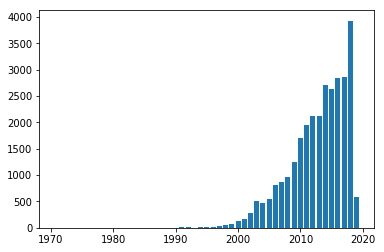

In [6]:
plt.bar(list(pubPerYear.keys()), pubPerYear.values())
plt.show()

## Count relative amoung of publications per year

Now the Counter object from above is used and scaled with all the publications ever written about exoplanets.

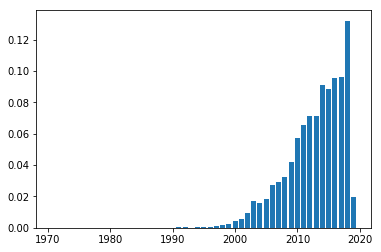

In [7]:
plt.bar(list(pubPerYear.keys()), [i/len(dfExoplanetsNASA) for i in pubPerYear.values()])
plt.show()